In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [4]:
from data_utils import *

In [2]:
data = pd.read_csv('./data/salary2.csv')

## 분석목적
* 학력, 교육연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
* 연봉이 5만달러 이상인지 아닌지(타겟변수)<br>
<br>
* age: 나이
* workclass: 고용형태
* education: 학력
* education-num: 교육연수
* marital-status: 혼인상태
* occupation: 직업
* relationship: 가족관계
* race: 인종
* sex: 성별
* capital-gain: 자산증가
* capital-loss: 자산감소
* hours-per-week: 주당 노동 시간
* native-country: 본국
* class: 연봉구분 - target(분석대상)

In [6]:
data.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


🧼 [결측치 비율 확인]

 - workclass: 5.7% △ 주의
 - occupation: 5.8% △ 주의
 - native-country: 1.8% △ 주의

📊 [숫자형 변수 이상값 리포트]

📌 age
 - Median: 37.00
 - Max: 90.00 / Min: 17.00
 - Mean ± 3*Std: [-2.49, 79.78]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 186건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [-2.00, 78.00]
 - IQR 기준 이상값: 216건
   → 🚨 이상값 의심됨 (IQR 기준)



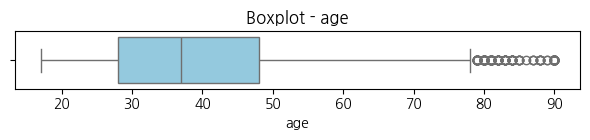

📌 education-num
 - Median: 10.00
 - Max: 16.00 / Min: 1.00
 - Mean ± 3*Std: [2.37, 17.79]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 330건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [4.50, 16.50]
 - IQR 기준 이상값: 1794건
   → 🚨 이상값 의심됨 (IQR 기준)



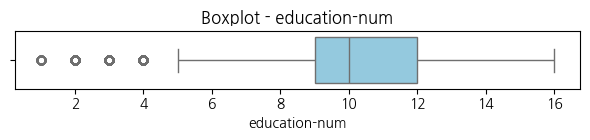

📌 capital-gain
 - Median: 0.00
 - Max: 99999.00 / Min: 0.00
 - Mean ± 3*Std: [-21276.99, 23435.12]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 331건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [0.00, 0.00]
 - IQR 기준 이상값: 4035건
   → 🚨 이상값 의심됨 (IQR 기준)



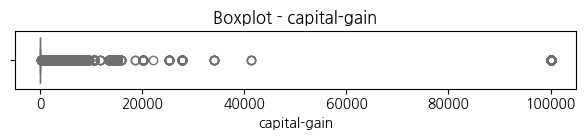

📌 capital-loss
 - Median: 0.00
 - Max: 4356.00 / Min: 0.00
 - Mean ± 3*Std: [-1121.51, 1296.52]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 2216건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [0.00, 0.00]
 - IQR 기준 이상값: 2282건
   → 🚨 이상값 의심됨 (IQR 기준)



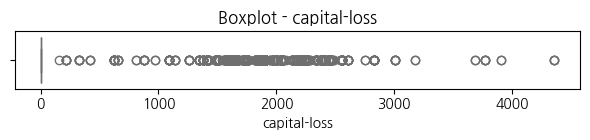

📌 hours-per-week
 - Median: 40.00
 - Max: 99.00 / Min: 1.00
 - Mean ± 3*Std: [3.25, 77.60]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 681건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [32.50, 52.50]
 - IQR 기준 이상값: 13496건
   → 🚨 이상값 의심됨 (IQR 기준)



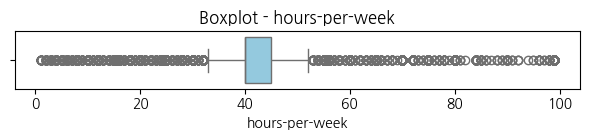


📦 [범주형 변수 희귀값 확인] (비율 < 1.0%)
 - workclass: 희귀값 31개 (0.1%) → ⚠️ 희귀 범주 존재
 - education: 희귀값 330개 (0.7%) → ⚠️ 희귀 범주 존재
 - marital-status: 희귀값 37개 (0.1%) → ⚠️ 희귀 범주 존재
 - occupation: 희귀값 257개 (0.5%) → ⚠️ 희귀 범주 존재
 - relationship: ✅ 전부 적정 분포
 - race: 희귀값 876개 (1.8%) → ⚠️ 희귀 범주 존재
 - sex: ✅ 전부 적정 분포
 - native-country: 희귀값 3202개 (6.6%) → ⚠️ 희귀 범주 존재
 - class: ✅ 전부 적정 분포


In [7]:
detailed_outlier_report(data)

# 결측값

In [9]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

### 1) workclass, occupation

In [10]:
data['workclass'].unique()

array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [35]:
pd.set_option('display.min_rows',100)
data[data['workclass'].isna()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
75,17,NaN,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
89,41,NaN,Masters,14,Married-civ-spouse,NaN,Wife,White,Female,7688,0,10,United-States,>50K
100,51,NaN,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,0,18,United-States,<=50K
113,20,NaN,HS-grad,9,Never-married,NaN,Own-child,White,Female,0,0,20,United-States,<=50K
132,20,NaN,HS-grad,9,Never-married,NaN,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [111]:
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [116]:
data[
    (data['workclass'].isna()) &
    (data['class']==' <=50K')
]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class


* workclass가 결측값일 경우 occupation도 결측값인 것으로 보임
* 이는 무직이라는 것인가?

In [23]:
data[
    (data['occupation'].isna()) &
    (~data['workclass'].isna())
]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
8785,17,Never-worked,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [37]:
data[
    data['workclass']==' Never-worked'
]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
8785,17,Never-worked,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


* workclass가 Never-worked이면 occupation이 NaN이다

In [48]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [47]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

* workclass의 결측값은 2799개이고 occupation의 결측값은 2809개
* workclass가 결측값일 경우 occupation도 결측값인 것을 보아 상관관계가 있는 것으로 보임
* 무직인 경우 이런 식의 데이터를 가지는 것인가 생각해봄
* workclass의 unique() 값을 확인해보면 array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object) 이런 식인데 여기에 무직이 있는 것인지 없는 것인지는 잘 모르겠음.
* 또한 workclass가 Never-worked 이면 occupation이 결측값인 것으로 보임
* workclass가 결측값인 것 2799개 + workclass가 Never-worked인 것 10개 = occupation 결측값 2809개가 나오는 것으로 보임
* 결측률은 5.7~5.8% 정도로 높지는 않지만 workclass와 occupation간의 상관관계를 갖는다는 점에서 섣불리 삭제를 하지 못하고 있음
* 최빈값인 Prof-specialty(6172개)로 대체하기에는 바로 다음으로 많은 Craft-repair(6112개)와 Exec-managerial(6086개) 굉장히 근소한 차이를 이루고 있어서 적절하지 않아보임
* 직업 자체가 없는데 해당 데이터를 종속변수(연봉)를 고려하는 데이터로서 가치가 있는지에 대해서 부정적인 견해가 있음
* 그러나 데이터 분포를 보아 2800여 개의 데이터를 삭제하는 것은 아쉬움이 있고 workclass가 Never-worked인 것은 다른 관점의 분석에 용이할 수 있음
* 따라서 workclass과 occupation의 결측값을 'Unknown'으로 처리
* workclass가 Never-worked인 occupation은 'No-occupation'으로 처리

In [51]:
data.loc[data['workclass']==' Never-worked','occupation'] = 'No-occupation'

In [53]:
data[data['workclass']==' Never-worked']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
8785,17,Never-worked,11th,7,Never-married,No-occupation,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,HS-grad,9,Married-spouse-absent,No-occupation,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,11th,7,Never-married,No-occupation,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,10th,6,Never-married,No-occupation,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,7th-8th,4,Divorced,No-occupation,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,10th,6,Never-married,No-occupation,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,11th,7,Never-married,No-occupation,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,Some-college,10,Never-married,No-occupation,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,HS-grad,9,Married-civ-spouse,No-occupation,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,Some-college,10,Never-married,No-occupation,Own-child,White,Male,0,0,4,United-States,<=50K


In [58]:
data['workclass'] = data['workclass'].fillna('Unknown')
data['occupation'] = data['occupation'].fillna('Unknown')

### 2) native-country

In [24]:
data[data['native-country'].isna()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
65,41,Private,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,NaN,<=50K
83,44,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,NaN,>50K
188,34,State-gov,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,NaN,<=50K
253,42,Federal-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,NaN,<=50K
305,37,Local-gov,Bachelors,13,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,NaN,<=50K
329,64,Self-emp-not-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,NaN,>50K
403,27,Private,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,36,NaN,<=50K
420,65,Private,1st-4th,2,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0,0,40,NaN,<=50K
471,28,State-gov,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,10,NaN,<=50K


In [26]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador      

* native-country의 결측률은 1.8%로 낮은 편이고 최빈값으로 대체하는 것이 적절하지 않아보이기 때문에 해당 행을 삭제를 고민 중
* 결측률이 1.8%이기는 하나 결측값이 857개로 최빈값인 미국이 아닌 다른 나라일 경우 유의미하게 국가 비중에 영향을 줄 것이라 판단해서 최빈값 대체가 적절하지 않다고 생각함
* 하지만 삭제를 하게 되면 다른 소수의 국가들의 분포를 고려했을 때 아쉬움. 그리고 현재 분석 목적에 국가가 독립변수를 독립변수로 생각하지 않음. 
* 따라서 'Unknown'으로 별도 처리

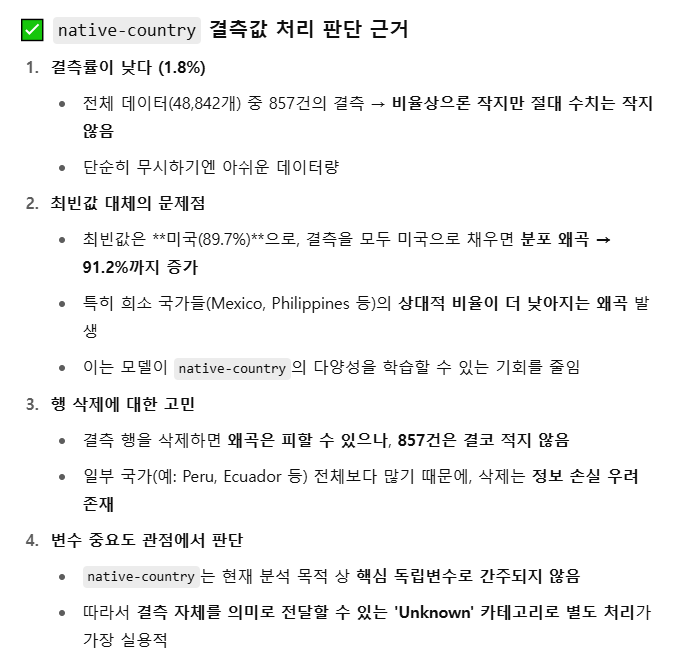

In [30]:
data['native-country'].fillna('Unknown', inplace=True)

In [61]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

# 이상값

🧼 [결측치 비율 확인]

 - workclass: 5.7% △ 주의
 - occupation: 5.8% △ 주의
 - native-country: 1.8% △ 주의

📊 [숫자형 변수 이상값 리포트]

📌 age
 - Median: 37.00
 - Max: 90.00 / Min: 17.00
 - Mean ± 3*Std: [-2.49, 79.78]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 186건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [-2.00, 78.00]
 - IQR 기준 이상값: 216건
   → 🚨 이상값 의심됨 (IQR 기준)



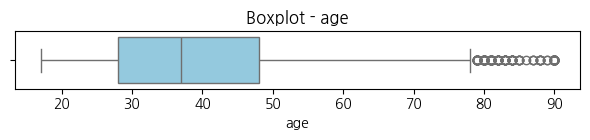

📌 education-num
 - Median: 10.00
 - Max: 16.00 / Min: 1.00
 - Mean ± 3*Std: [2.37, 17.79]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 330건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [4.50, 16.50]
 - IQR 기준 이상값: 1794건
   → 🚨 이상값 의심됨 (IQR 기준)



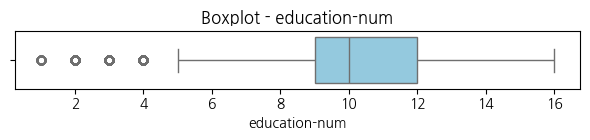

📌 capital-gain
 - Median: 0.00
 - Max: 99999.00 / Min: 0.00
 - Mean ± 3*Std: [-21276.99, 23435.12]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 331건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [0.00, 0.00]
 - IQR 기준 이상값: 4035건
   → 🚨 이상값 의심됨 (IQR 기준)



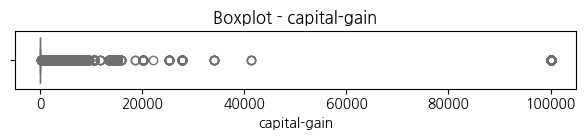

📌 capital-loss
 - Median: 0.00
 - Max: 4356.00 / Min: 0.00
 - Mean ± 3*Std: [-1121.51, 1296.52]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 2216건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [0.00, 0.00]
 - IQR 기준 이상값: 2282건
   → 🚨 이상값 의심됨 (IQR 기준)



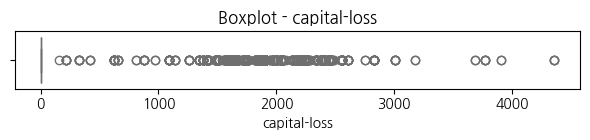

📌 hours-per-week
 - Median: 40.00
 - Max: 99.00 / Min: 1.00
 - Mean ± 3*Std: [3.25, 77.60]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 681건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [32.50, 52.50]
 - IQR 기준 이상값: 13496건
   → 🚨 이상값 의심됨 (IQR 기준)



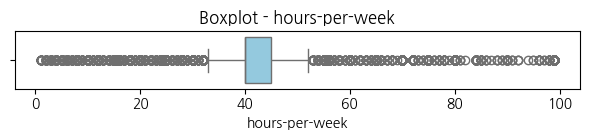


📦 [범주형 변수 희귀값 확인] (비율 < 1.0%)
 - workclass: 희귀값 31개 (0.1%) → ⚠️ 희귀 범주 존재
 - education: 희귀값 330개 (0.7%) → ⚠️ 희귀 범주 존재
 - marital-status: 희귀값 37개 (0.1%) → ⚠️ 희귀 범주 존재
 - occupation: 희귀값 257개 (0.5%) → ⚠️ 희귀 범주 존재
 - relationship: ✅ 전부 적정 분포
 - race: 희귀값 876개 (1.8%) → ⚠️ 희귀 범주 존재
 - sex: ✅ 전부 적정 분포
 - native-country: 희귀값 3202개 (6.6%) → ⚠️ 희귀 범주 존재
 - class: ✅ 전부 적정 분포


In [27]:
detailed_outlier_report(data)

In [62]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


* 나이는 최소 17세, 최대 90세로 큰 이상은 없어보임
* 90세가 아직 일한다는 게 좀 어려워 보이긴 하나 불가능한 것은 아니므로 넘어감
* education-num은 1에서 16까지 초등학교부터 대학교 과정까지를 말하는 것으로 보임. 큰 이상은 없는 것 같음.
* capital-gain과 capital-loss는 데이터 분포가 너무 상이하지만 자산 가치와 증가는 모 아니면 도이고, 어떤 자산을 새로 구매하거나 했을 때의 증가치는 상당히 높을 것으로 예상되므로 문제는 없어보임
* **hours-per-week**는 평일인 주 5일 기준으로 계산되어야하는 것을 생각해보면 이상치가 상당히 많은 것으로 생각됨

In [96]:
data.corr(numeric_only=True)

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.030940,0.077229,0.056944,0.071558
education-num,0.030940,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,0.143689,0.082157,0.054467,1.000000


In [102]:
pd.get_dummies(data, drop_first=True).corr(method='spearman')

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknown,class_ >50K
age,1.000000,0.063212,0.124436,0.057584,0.146604,0.067320,-0.021488,-0.182164,0.103037,0.141760,...,0.010997,-0.003361,-0.011056,-0.000168,0.002743,0.009006,-0.013126,0.003741,0.003608,0.269433
education-num,0.063212,1.000000,0.118871,0.077017,0.164437,0.100896,-0.014368,-0.122573,0.075998,0.013811,...,0.000617,0.011678,0.042694,0.006527,-0.009108,0.057454,-0.004516,-0.005069,0.034300,0.327815
capital-gain,0.124436,0.118871,1.000000,-0.066328,0.091914,0.006879,-0.004289,-0.036797,0.070088,0.019613,...,-0.002669,-0.003492,0.001232,-0.004414,-0.004036,0.015925,0.002933,0.007015,0.002234,0.277734
capital-loss,0.057584,0.077017,-0.066328,1.000000,0.060063,0.011092,-0.003167,-0.023413,0.032718,0.013993,...,-0.004590,0.005361,0.002666,-0.001729,0.003187,0.010176,-0.000119,-0.004803,0.002111,0.138248
hours-per-week,0.146604,0.164437,0.091914,0.060063,1.000000,0.003519,-0.014492,-0.012772,0.128323,0.085692,...,0.001447,0.009224,-0.002940,0.004792,-0.002137,0.015613,-0.011668,0.002046,0.007033,0.268166
workclass_ Local-gov,0.067320,0.100896,0.006879,0.011092,0.003519,1.000000,-0.003748,-0.394659,-0.049666,-0.076753,...,-0.005433,-0.012725,-0.004980,-0.003123,0.000947,0.034874,-0.003032,-0.001836,-0.012103,0.034576
workclass_ Never-worked,-0.021488,-0.014368,-0.004289,-0.003167,-0.014492,-0.003748,1.000000,-0.021561,-0.002713,-0.004193,...,-0.000297,-0.000695,-0.000522,-0.000355,-0.000337,0.004838,-0.000601,-0.000311,-0.001912,-0.008026
workclass_ Private,-0.182164,-0.122573,-0.036797,-0.023413,-0.012772,-0.394659,-0.021561,1.000000,-0.285679,-0.441487,...,0.005191,-0.020018,-0.009901,-0.001481,0.000485,-0.041459,0.008796,0.002117,0.001378,-0.075625
workclass_ Self-emp-inc,0.103037,0.075998,0.070088,0.032718,0.128323,-0.049666,-0.002713,-0.285679,1.000000,-0.055559,...,-0.003932,0.018485,0.017626,0.013359,0.005059,-0.001893,-0.005295,0.001041,0.016409,0.139596
workclass_ Self-emp-not-inc,0.141760,0.013811,0.019613,0.013993,0.085692,-0.076753,-0.004193,-0.441487,-0.055559,1.000000,...,0.001243,0.029598,-0.008615,0.001923,-0.003663,0.011040,0.000362,0.007629,-0.001019,0.027190


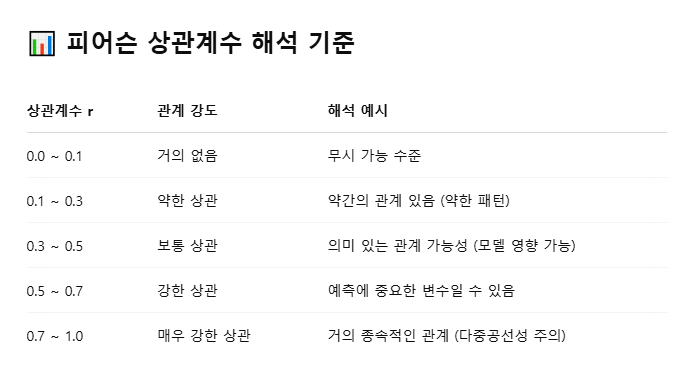

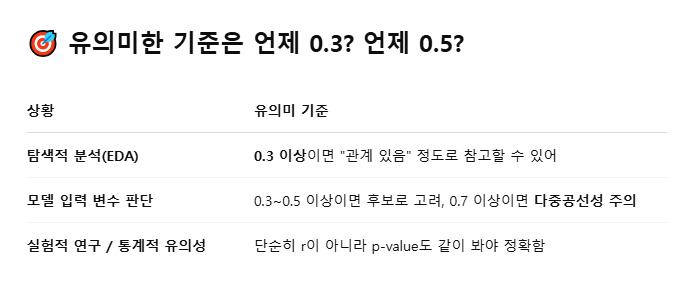

# class를 먼저 0/1로 변경 후 범주별 >50K 비율 확인!!

In [78]:
categorical = data.select_dtypes(exclude=['number']).columns.tolist()
data.loc[:,categorical]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Unknown,Some-college,Never-married,Unknown,Own-child,White,Female,United-States,<=50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
6,Unknown,HS-grad,Never-married,Unknown,Unmarried,Black,Male,United-States,<=50K
7,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
8,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,United-States,<=50K
9,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K


In [81]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [94]:
data[categorical].nunique()

workclass          9
education         16
marital-status     7
occupation        16
relationship       6
race               5
sex                2
native-country    42
class              2
dtype: int64

In [97]:
data['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
       ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [98]:
data['education-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

* education이랑 education-num이랑 같은 의미를 갖는 것으로 보임

In [100]:
data.loc[:,['education','education-num']]

,education,education-num
0,11th,7
1,HS-grad,9
2,Assoc-acdm,12
3,Some-college,10
4,Some-college,10
5,10th,6
6,HS-grad,9
7,Prof-school,15
8,Some-college,10
9,7th-8th,4


In [101]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Unknown,HS-grad,9,Never-married,Unknown,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [103]:
data_temp = data.drop(['education','native-country','occupation' ],axis=1)
data_temp

,age,workclass,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class
0,25,Private,7,Never-married,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,9,Married-civ-spouse,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,Husband,White,Male,0,0,40,>50K
3,44,Private,10,Married-civ-spouse,Husband,Black,Male,7688,0,40,>50K
4,18,Unknown,10,Never-married,Own-child,White,Female,0,0,30,<=50K
5,34,Private,6,Never-married,Not-in-family,White,Male,0,0,30,<=50K
6,29,Unknown,9,Never-married,Unmarried,Black,Male,0,0,40,<=50K
7,63,Self-emp-not-inc,15,Married-civ-spouse,Husband,White,Male,3103,0,32,>50K
8,24,Private,10,Never-married,Unmarried,White,Female,0,0,40,<=50K
9,55,Private,4,Married-civ-spouse,Husband,White,Male,0,0,10,<=50K


## one-hot encoding

In [104]:
pd.get_dummies(data_temp, drop_first=True)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,class_ >50K
0,25,7,0,0,40,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
1,38,9,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
2,28,12,0,0,40,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,44,10,7688,0,40,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
4,18,10,0,0,30,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
5,34,6,0,0,30,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
6,29,9,0,0,40,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
7,63,15,3103,0,32,False,False,False,False,True,...,False,False,False,False,False,False,False,True,True,True
8,24,10,0,0,40,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
9,55,4,0,0,10,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False


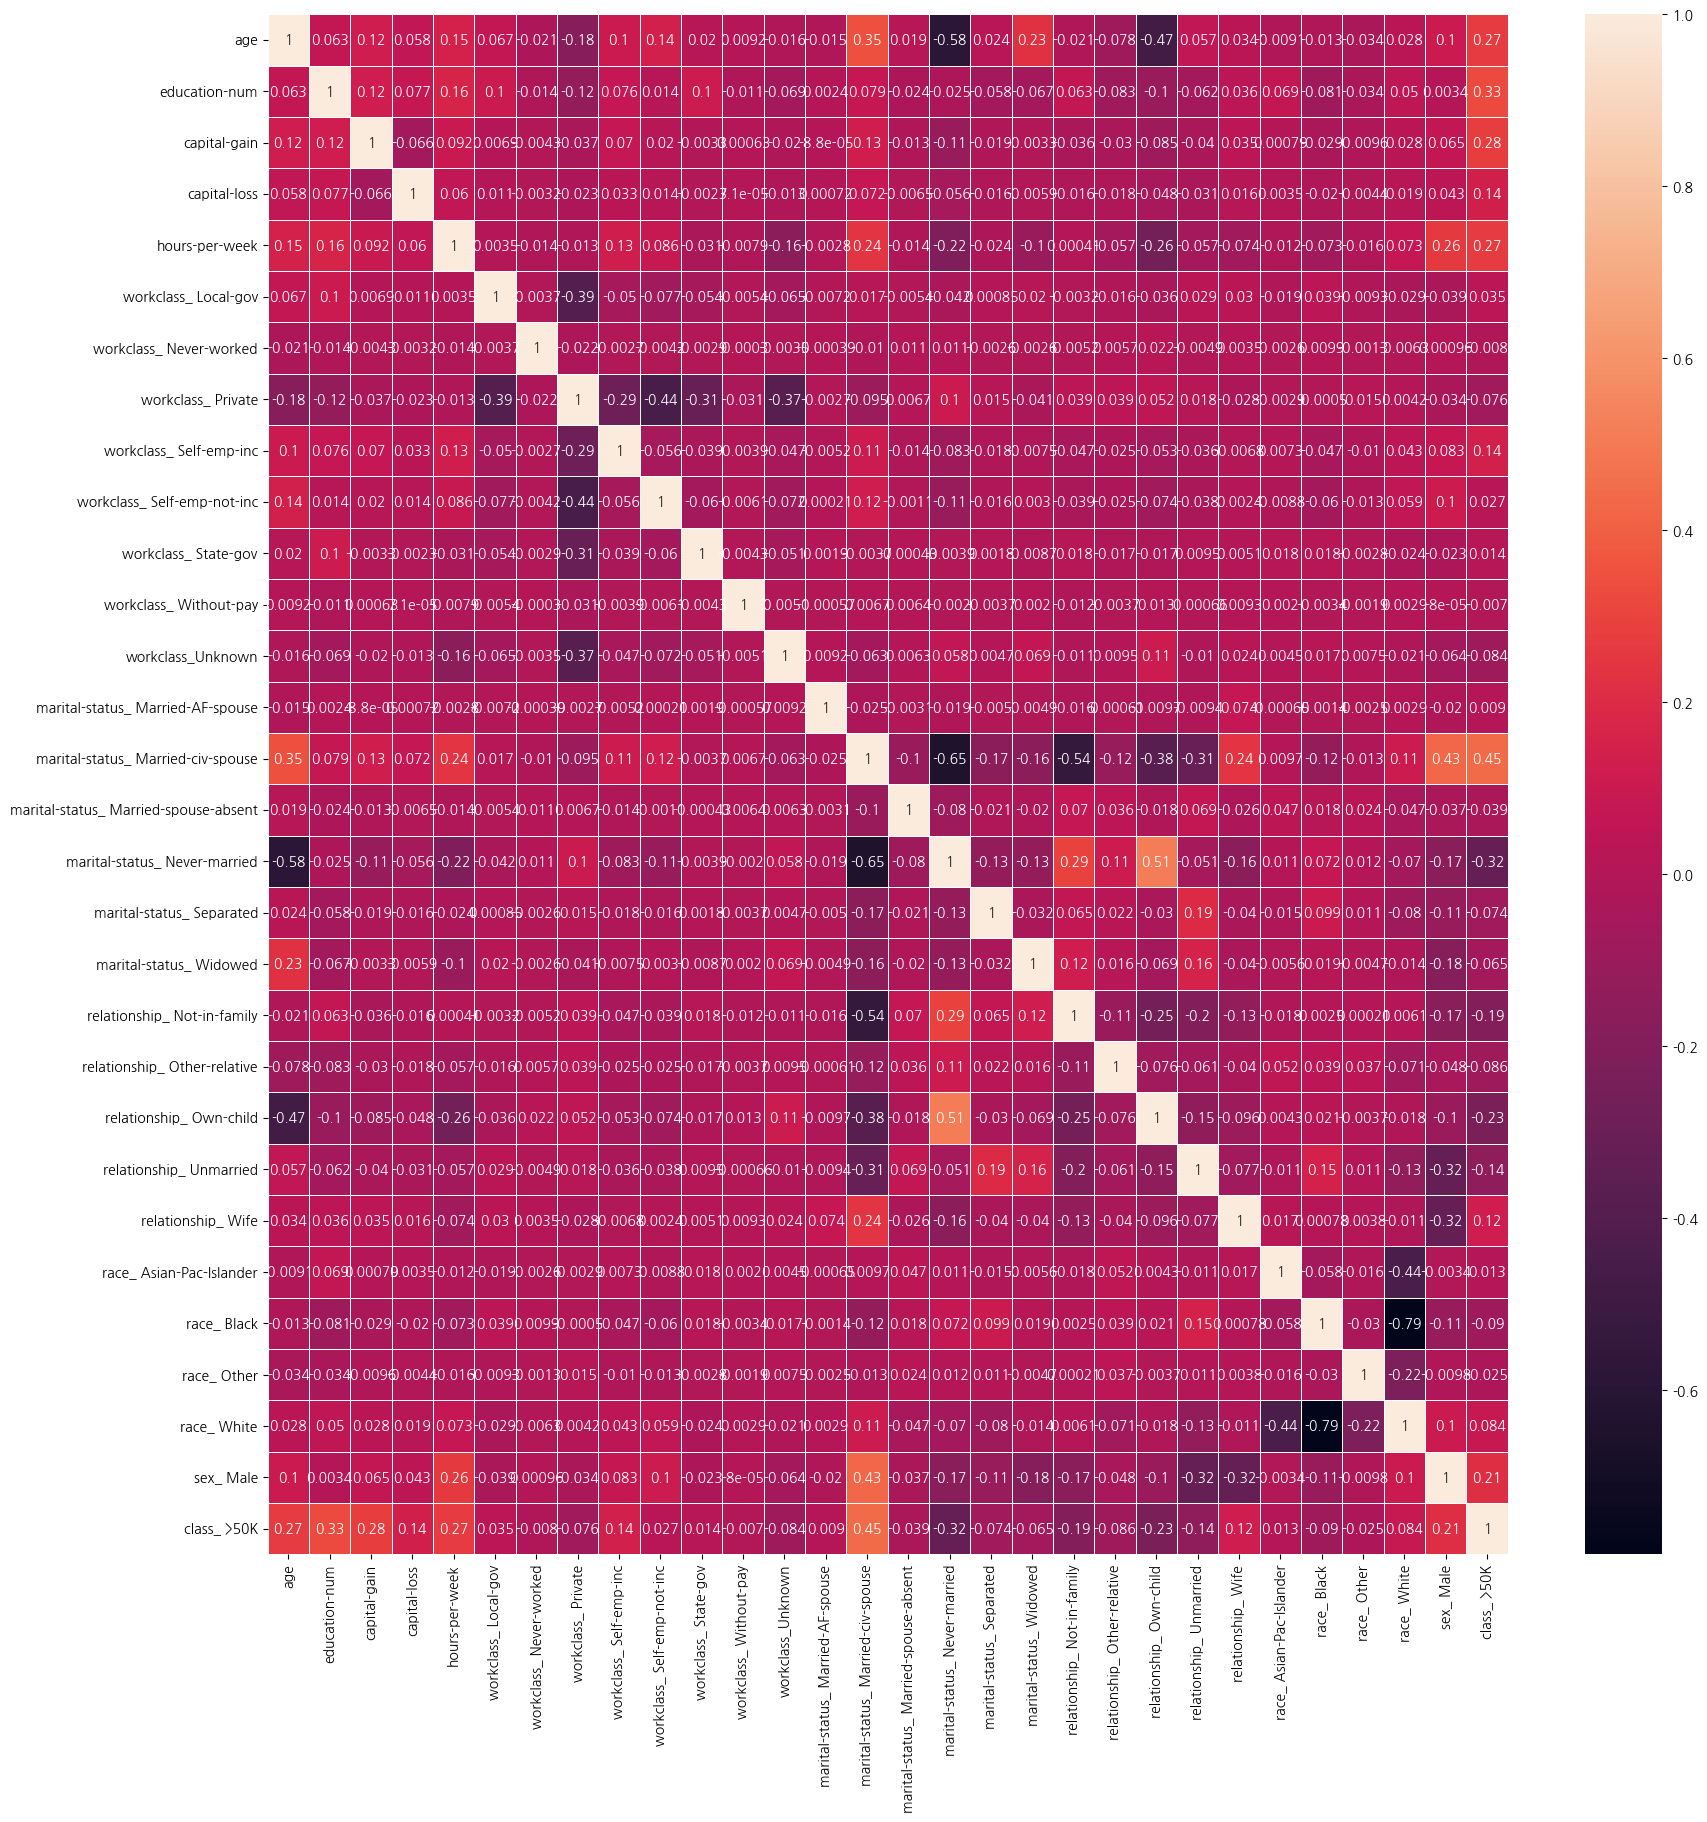

In [107]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.get_dummies(data_temp, drop_first=True).corr(method='spearman'), annot=True, linewidths=0.5)
plt.show()

# 모델

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [133]:
X = pd.get_dummies(data_temp).drop(['class_ >50K', 'class_ <=50K'], axis=1)
y = pd.get_dummies(data_temp, drop_first=True)['class_ >50K']

In [142]:
X

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,7,0,0,40,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,True
1,38,9,0,0,50,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
2,28,12,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,44,10,7688,0,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
4,18,10,0,0,30,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
5,34,6,0,0,30,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
6,29,9,0,0,40,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
7,63,15,3103,0,32,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
8,24,10,0,0,40,False,False,False,True,False,...,False,True,False,False,False,False,False,True,True,False
9,55,4,0,0,10,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [136]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

In [128]:
from sklearn.metrics import accuracy_score, classification_report

In [137]:
print(accuracy_score(y_test, pred))

0.8271343752132669


In [138]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.88      0.90      0.89     11127
        True       0.66      0.59      0.62      3526

    accuracy                           0.83     14653
   macro avg       0.77      0.75      0.76     14653
weighted avg       0.82      0.83      0.82     14653



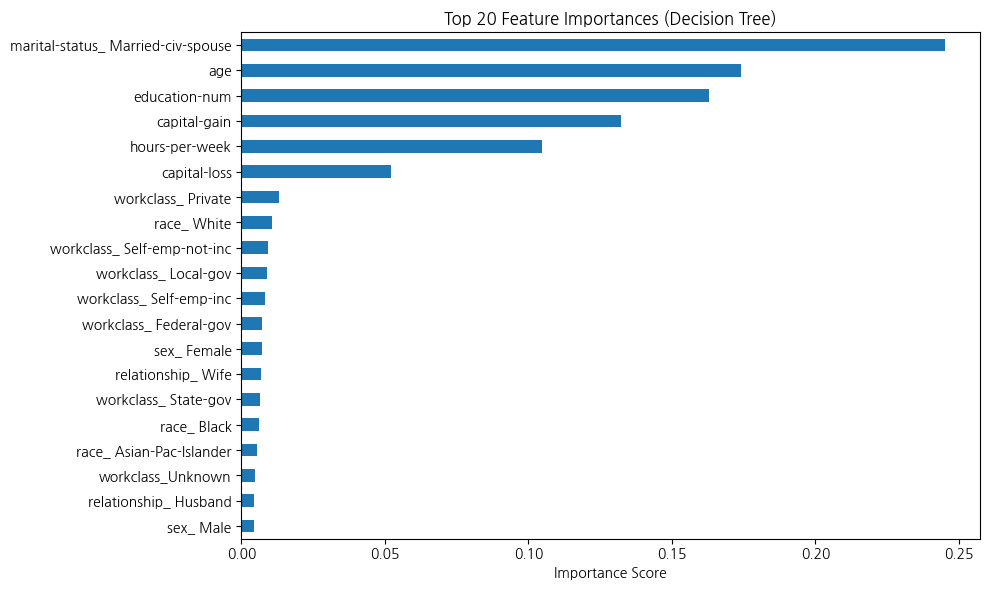

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# 중요도 추출
importances = dtc.feature_importances_
feature_names = X.columns

# pandas 시리즈로 정리해서 내림차순 정렬
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 상위 20개 변수 시각화
plt.figure(figsize=(10, 6))
feat_importance.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Decision Tree)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

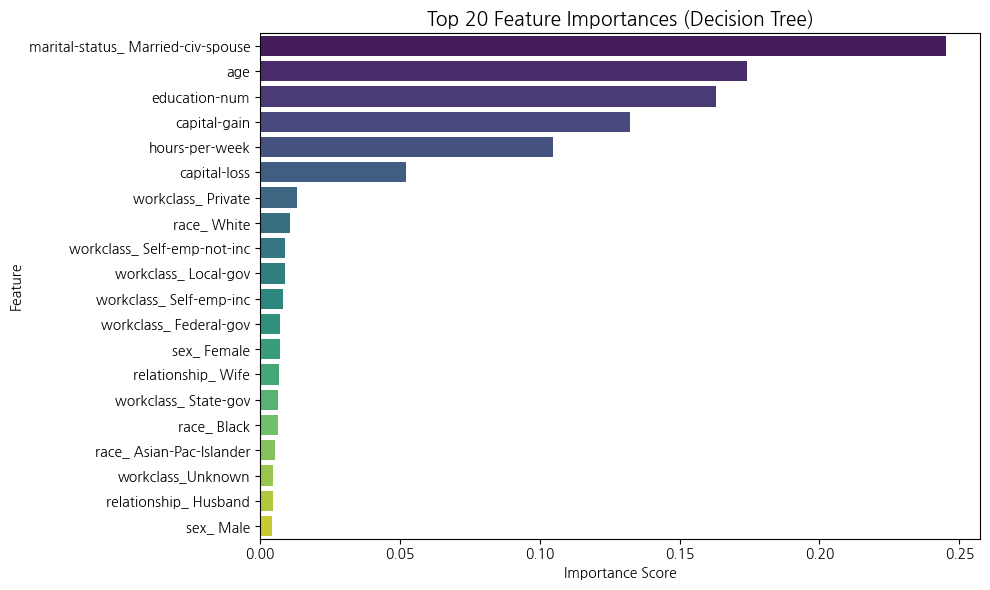

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

top_feat = feat_importance.head(20).reset_index()
top_feat.columns = ['Feature', 'Importance']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_feat, x='Importance', y='Feature', hue='Feature', dodge=False, palette='viridis', legend=False)

plt.title("Top 20 Feature Importances (Decision Tree)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 모델 성능 튜닝(하이퍼파라미터 튜닝)

In [145]:
for i in range(1,11):
    dtc = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print('='*30, f'max_depth : {i}','='*30)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

============================== max_depth : 1 ==============================
0.7593666825905958
              precision    recall  f1-score   support

       False       0.76      1.00      0.86     11127
        True       0.00      0.00      0.00      3526

    accuracy                           0.76     14653
   macro avg       0.38      0.50      0.43     14653
weighted avg       0.58      0.76      0.66     14653


============================== max_depth : 2 ==============================
0.8263154302873131
              precision    recall  f1-score   support

       False       0.85      0.94      0.89     11127
        True       0.71      0.47      0.57      3526

    accuracy                           0.83     14653
   macro avg       0.78      0.71      0.73     14653
weighted avg       0.82      0.83      0.81     14653


============================== max_depth : 3 ==============================
0.8411246843649764
              precision    recall  f1-score   support

    

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

       False       0.87      0.94      0.90     11127
        True       0.75      0.57      0.64      3526

    accuracy                           0.85     14653
   macro avg       0.81      0.75      0.77     14653
weighted avg       0.84      0.85      0.84     14653


============================== max_depth : 6 ==============================
0.8543642940012284
              precision    recall  f1-score   support

       False       0.87      0.95      0.91     11127
        True       0.79      0.54      0.64      3526

    accuracy                           0.85     14653
   macro avg       0.83      0.75      0.77     14653
weighted avg       0.85      0.85      0.84     14653


============================== max_depth : 7 ==============================
0.8549785026956938
              precision    recall  f1-score   support

       False       0.87      0.95      0.91     11127
        True       0.78      0.56      0.65  

# DecisionTree 시각화

In [146]:
from sklearn.tree import plot_tree

In [147]:
dtc = DecisionTreeClassifier(max_depth=9, random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

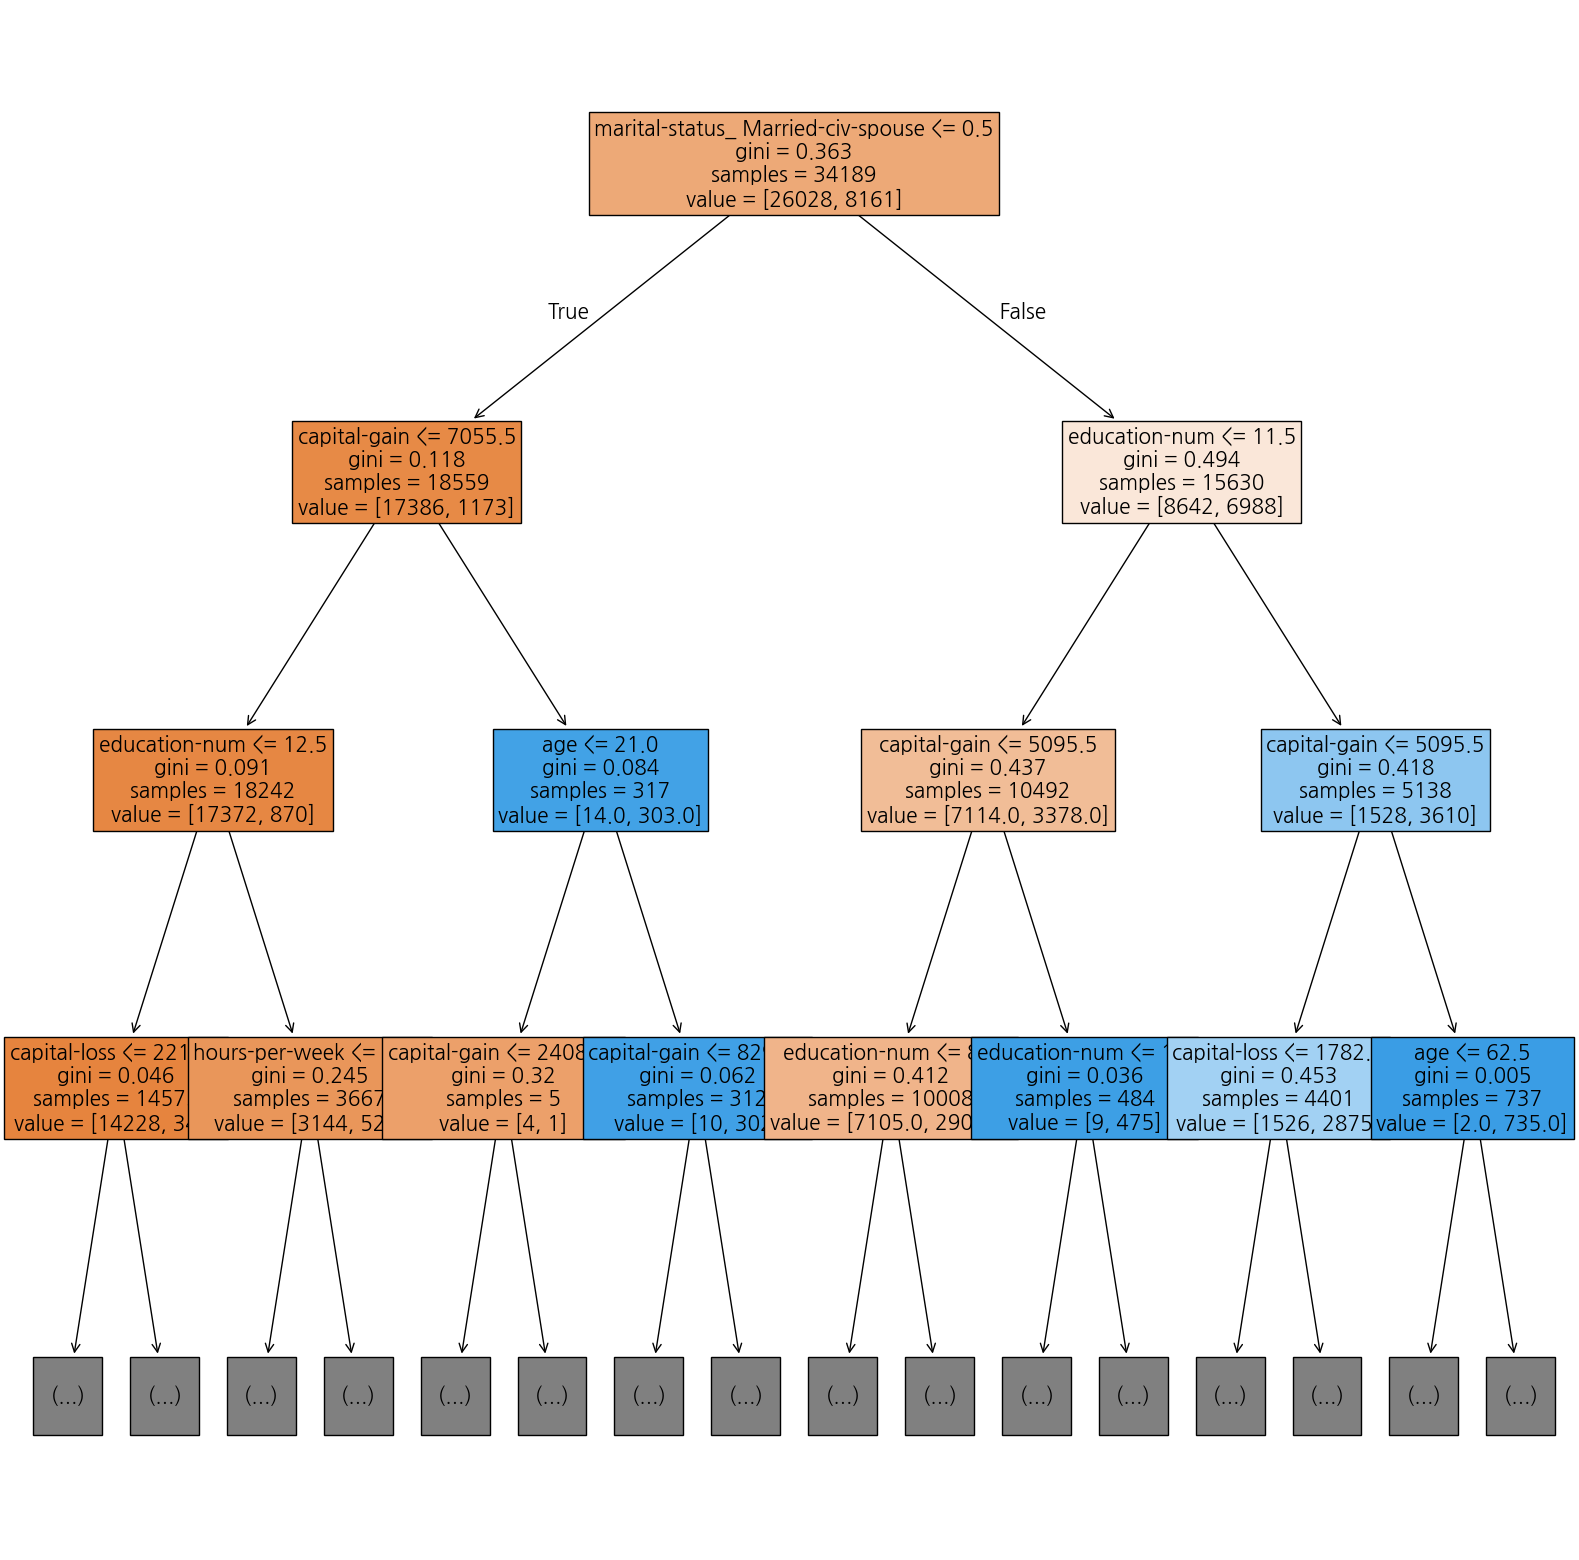

In [149]:
plt.figure(figsize=(20,20))
plot_tree(dtc, max_depth=3,feature_names=dtc.feature_names_in_, fontsize=15, filled=True)
plt.show()